# Matemática Financeira com Pandas
_(Fonte: https://fschuch.com/blog/2020/04/11/alugar-economizar-e-pagar-a-vista-ou-financiar-um-imovel-um-estudo-de-caso)_


## Sistemas de Amortização

Quando falamos em sistemas de pagamento, ou sistema de amortização, existem quatro parâmetros fundamentais:



*   Tempo total **$N$**;
*   Taxa de juros **$i$**;
*   Saldo devedor inicial **${SD}_{0}$**;
*   Valor da parcela, que por sua vez é subdividido em:

    *  Amortização, valor que efetivamente abate parte do saldo devedor;
    *  Juros, valor pago como remuneração ao financiador,
onde observa-se que:

$$
Amortização = Parcelas - Juros.
$$

Pode-se citar pelo menos dois modelos clássicos que tratam dessa relação:



*   **Sistema de Amortização Constante (SAC)**: Como o próprio nome sugere, a amortização é constante ao longo de todo o tempo:

$$
Amortização_{n} = \frac{{SD}_{0}}{N}
$$

Os juros são obtidos ao multiplicar a taxa de juros pelo saldo devedor do período anterior:

$$
Juros_{n} = i \times{SD}_{n-1}
$$

E como vimos, a parcela é a soma dos dois anteriores:

$$
Parcela_{n} = Juros_{n} + Amortização_{n}.
$$

Note que nesse sistema, o saldo devedor decresce linearmente, além disso, as prestações diminuem gradualmente com o passar do tempo.

*    Outra opção é a **Tabela Price**, ou sistema francês de amortização. Aqui, o valor das parcelas é constante no tempo, e obtido por meio de equação:

$$
Parcela = SD_{0} \frac{i}{1-(1+i)^{-n}}.
$$

Outra opção é a Tabela Price, ou sistema francês de amortização. Aqui, o valor das parcelas é constante no tempo, e obtido por meio de equação:

$$
Juros_{n} = i \times{SD}_{n-1}
$$

E por fim obtemos o valor da amortização de cada parcela como:

$$
Amortização_{n} = Parcela_{n} - Juros_{n} .
$$

Tendo tudo isso em vista, podemos construir uma rotina em Python que nos retorne um Data Frame em Pandas, que nada mais é do que uma tabela. Ele inclui os valores obtidos para juros, amortização, parcela e saldo devedor para cada período $n$, em função da escolha do sistema de pagamento **(SAC ou Price)**, da taxa de juros $i$, do número de períodos de tempo $N$ e do saldo devedor inicial ${SD}_{0}$. Segue a função:



In [ ]:
# As primeiras linhas de código tratam de importar ambas bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

def sistema_pagamento(sis,i,N,SD0):
    '''
    Calcula os juros, amortização, valor das
    parcelas e saldo devedor em função do
    sistema de amortização escolhido

    Args:
        sis (str): Sistema de amortização
                   (SAC ou Price)
        i (float): Taxa de juros
        N (int): Períodos de tempo
        SD0 (float): Saldo devedor inicial

    Returns:
        df: DataFrame com as colunas juros,
            amortização, valor das parcelas
            e saldo devedor
    '''
    df = pd.DataFrame(columns=['Juros',
                               'Amortização',
                               'Parcela',
                               'Saldo Devedor'],
                      index=range(N+1)
                     )

    df['Saldo Devedor'][0] = SD0

    if sis.lower() == 'sac':

        df['Amortização'][1:] = SD0/N

        for n in df.index[1:]:
            df['Juros'][n] = round(df['Saldo Devedor'][n-1]*i,2)
            df['Parcela'][n] = df['Juros'][n]+df['Amortização'][n]
            df['Saldo Devedor'][n] = df['Saldo Devedor'][n-1] - df['Amortização'][n]

    elif sis.lower() == 'price':

        df['Parcela'][1:] = round(SD0*(i)/(1-(1+i)**(-N)),2)

        for n in df.index[1:]:
            df['Juros'][n] = round(df['Saldo Devedor'][n-1]*i,2)
            df['Amortização'][n] = df['Parcela'][n] - df['Juros'][n]
            df['Saldo Devedor'][n] = df['Saldo Devedor'][n-1] - df['Amortização'][n]

    else:
        print('Valor inválido para sis, tente novamente com sac ou price')

    # Aqui ajustamos a última parcela caso tenha valor residual devido ao arredondamento
    df['Parcela'][N] += df['Saldo Devedor'][N]
    df['Saldo Devedor'][N] -= df['Saldo Devedor'][N]

    return df


In [ ]:
# As primeiras linhas de código tratam de importar ambas bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

def sistema_pagamento(i,N,SD0):

    df = pd.DataFrame(columns=['Juros','Amortização','Parcela','Saldo Devedor'],index=range(N+1))

    df['Saldo Devedor'][0] = SD0

    df['Amortização'][1:] = SD0/N

    for n in df.index[1:]:
        df['Juros'][n] = round(df['Saldo Devedor'][n-1]*i,2)
        df['Parcela'][n] = df['Juros'][n]+df['Amortização'][n]
        df['Saldo Devedor'][n] = df['Saldo Devedor'][n-1] - df['Amortização'][n]

    # Aqui ajustamos a última parcela caso tenha valor residual devido ao arredondamento
    df['Parcela'][N] += df['Saldo Devedor'][N]
    df['Saldo Devedor'][N] -= df['Saldo Devedor'][N]

    return df


Agora podemos ver um exemplo da função em ação para ambos os sistemas de pagamento, para um taxa de juros de $5$%, $4$ períodos de tempo e saldo devedor inicial de  $ R{$}1.000$:

In [ ]:
sistema_pagamento(0.05,4,1000)

,Juros,Amortização,Parcela,Saldo Devedor
0,NaN,NaN,NaN,1000
1,50.0,250.0,300.0,750.0
2,37.5,250.0,287.5,500.0
3,25.0,250.0,275.0,250.0
4,12.5,250.0,262.5,0.0


Note na tabela acima algumas posições marcadas com **NaN**, abreviação para não um número (do inglês para Not a Number). Eles ocorreram no nosso exemplo para o tempo $0$, onde valores não foram informados para algumas colunas. O **NaN** não é necessariamente um problema, a biblioteca Pandas é justamente capaz de lidar com dados faltantes. Perceba que essas células podem ser definidos para qualquer valor desejado com o método `fillna()`, vamos utilizá-lo no segundo exemplo:

In [ ]:
sistema_pagamento(0.05,4,1000).fillna(0)

,Juros,Amortização,Parcela,Saldo Devedor
0,0.0,0.0,0.0,1000.0
1,50.0,250.0,300.0,750.0
2,37.5,250.0,287.5,500.0
3,25.0,250.0,275.0,250.0
4,12.5,250.0,262.5,0.0


Uma das vantagens de se trabalhar com dados tabulares é que eles podem ser facilmente transformados em gráfico, veja como fazemos isso com apenas algumas linhas de código:

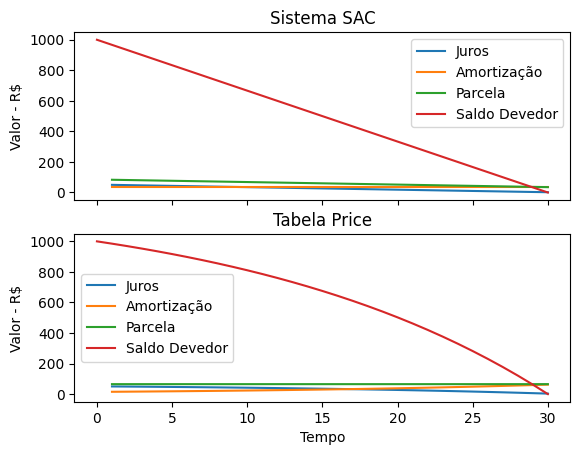

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2,
                               ncols=1,
                               sharex=True,
                               sharey=True)

sistema_pagamento('sac',0.05,30,1000).plot(ax=ax1,title='Sistema SAC')
sistema_pagamento('price',0.05,30,1000).plot(ax=ax2,title='Tabela Price')

ax2.set_xlabel('Tempo')
ax1.set_ylabel('Valor - R$')
ax2.set_ylabel('Valor - R$');

## Cenários
Aqui estabelecemos os parâmetros de cálculo que serão empregados nos diferentes cenários. São eles:



*   Valor do imóvel valor_do_imovel;
*   Valor da entrada entrada;
*   Taxa de juros anual para o financiamento taxa_financeamento_anual;
*   Taxa anual de aluguel taxa_aluguel_anual:
*   Fração do preço total do imóvel que seria paga como aluguel em um ano;
*   Rendimento anual esperado caso os aportes sejam investidos rendimento_investimentos_anual;
*   Quantos anos são esperados para o pagamento tempo_anos;
*   Sistema de amortização sistema (SAC ou Price)

Além disso, assume-se que nestes exemplos, todos os parâmetros mantenham-se constantes ao longo do tempo, o que certamente não ocorre em situações reais.



In [ ]:
valor_do_imovel = 500000.00
entrada = 100000.00
taxa_financeamento_anual = 0.0942
taxa_aluguel_anual = 0.04
rendimento_investimentos_anual = 0.08
tempo_anos = 30

sistema = 'SAC'
#sistema = 'PRICE'

Agora obtemos a taxa de juros mensal correspondente aos valores anualizados que utilizamos como entrada. Lembre-se que:

$$
i_{mensal} = ( 1 + i_{anual})^{\frac{1}{12}}-1,
$$
de maneira que podemos escrever a seguinte função:

In [ ]:
def taxa_aa_para_am(i):
    '''
    Função recebe uma taxa de juros anual
    e retorna a taxa mensal equivalente.
    '''
    return (1.+i)**(1./12.)-1.

No seguinte bloco obtemos a valor a ser financiado como o valor do imóvel menos o valor da entrada, além disso, convertemos as taxas para termos mensais, assim como o tempo:

In [ ]:
valor_do_financiamento = valor_do_imovel - entrada
taxa_financeamento = taxa_aa_para_am(taxa_financeamento_anual)
taxa_aluguel = taxa_aa_para_am(taxa_aluguel_anual)
rendimento_investimentos = taxa_aa_para_am(rendimento_investimentos_anual)
tempo = tempo_anos * 12

## Financiar

O primeiro cenário consiste em financiar um imóvel, e para tanto basta aplicarmos a função do sistema de pagamentos que construimos na etapa inicial desse estudo:

In [ ]:
financiar = sistema_pagamento(
    sistema,
    taxa_financeamento,
    tempo,
    valor_do_financiamento
)

Para fins comparativos, vamos estabelecer a evolução temporal do `Patrimônio - Imóvel` como a soma acumulativa dos valores de amortização (valor da parcela que efetivamente abate o saldo devedor) e da entrada, enquanto `Custo - Juros` será a soma acumulativa dos valores de juros (valor da parcela que remunera a instituição financiadora).

In [ ]:
financiar['Patrimônio - Imóvel'] = financiar['Amortização'].cumsum() + entrada
financiar['Custo - Juros'] = financiar['Juros'].cumsum()

Podemos visualizar todos os elementos da nossa tabela:

In [ ]:
financiar

,Juros,Amortização,Parcela,Saldo Devedor,Patrimônio - Imóvel,Custo - Juros
0,NaN,NaN,NaN,400000.0,NaN,NaN
1,3012.07,1111.111111,4123.181111,398888.888889,101111.111111,3012.07
2,3003.7,1111.111111,4114.811111,397777.777778,102222.222222,6015.77
3,2995.33,1111.111111,4106.441111,396666.666667,103333.333333,9011.1
4,2986.97,1111.111111,4098.081111,395555.555556,104444.444444,11998.07
...,...,...,...,...,...,...
356,41.83,1111.111111,1152.941111,4444.444444,495555.555556,543594.51
357,33.47,1111.111111,1144.581111,3333.333333,496666.666667,543627.98
358,25.1,1111.111111,1136.211111,2222.222222,497777.777778,543653.08
359,16.73,1111.111111,1127.841111,1111.111111,498888.888889,543669.81


Ou facilmente graficar os resultados para o primeiro cenário:

Text(0, 0.5, 'Valor (R$)')

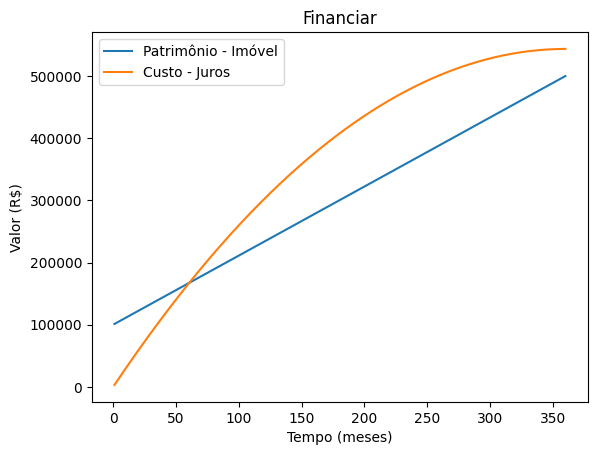

In [ ]:
financiar[['Patrimônio - Imóvel',
           'Custo - Juros']
         ].plot(title='Financiar')
plt.xlabel('Tempo (meses)')
plt.ylabel('Valor (R$)')

Veja o que dizem os números:



> Ao longo de 360 meses, o montante total de R$1.043.678,18 foi desembolsado, sendo:
 *   R\$543.678,18 para a instituição financeira (52,09% do total);
 *   R\$500.000,0 foram aportados no imóvel (47,91% do total).







## Alugar e Aportar Mensalmente
O segundo cenário avalia não comprar, mas sim alugar o imóvel pelo tempo estipulado. Entretanto, considera-se que todos os valores que seriam gastos com o financiamento no caso anterior serão convertidos em aportes em aplicações financeiras.

In [ ]:
# Inicializamos um DataFrame vazio
alugar = pd.DataFrame(index=range(tempo+1))

# Calculamos o valor do aluguel
aluguel = round((valor_do_imovel)*taxa_aluguel,2)
alugar['Aluguel'] = aluguel
# Aluguel no tempo zero é igual a zero
alugar['Aluguel'][0] = 0.0

# Aqui calculamos o custo com aluguel como o somatório
# de todos os valores pagos
alugar['Custo - Aluguel'] = alugar['Aluguel'].cumsum()

# O aporte em aplicações financeiras se da pela diferença
# entre o que seria pago de financiamento no exemplo anterior
# e o valor do aluguel do imóvel
alugar['Aportes'] = financiar['Parcela'] - aluguel

# E o aporte inicial é o valor que estaria disponível como entrada
alugar['Aportes'][0] = entrada

NameError: ignored

Nesse exemplo faremos uma separação do Patrimônio em duas partes, a fração que é proveniente dos aportes como `Patrimônio - Principal`, enquanto a parte proveniente do rendimento dos juros será denominada ` Patrimônio - Rendimentos`, que podem ser calculados como segue:

In [ ]:
# Aqui a variável é basicamente inicializada
alugar['Patrimônio'] = alugar['Aportes']

# O patrimônio é realmente calculado neste laço
for n in alugar.index[1:]:
    alugar['Patrimônio'][n] = alugar['Aportes'][n] + alugar['Patrimônio'][n-1] * (1. + rendimento_investimentos)

# Por fim, a fração Principal é tida como o somatório de todos os aportes
alugar['Patrimônio - Principal'] = alugar['Aportes'].cumsum()
# E os rendimentos são obtidos pela seguinte subtração
alugar['Patrimônio - Rendimentos'] = alugar['Patrimônio'] - alugar['Patrimônio - Principal']

<ipython-input-17-0849156b1469>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alugar['Patrimônio'][n] = alugar['Aportes'][n] + alugar['Patrimônio'][n-1] * (1. + rendimento_investimentos)


In [ ]:
alugar


,Aluguel,Custo - Aluguel,Aportes,Patrimônio,Patrimônio - Principal,Patrimônio - Rendimentos
0,0.00,0.00,100000.0,100000.0,100000.0,0.0
1,1636.87,1636.87,2486.311111,103129.714122,102486.311111,643.403011
2,1636.87,3273.74,2477.941111,106271.194919,104964.252222,1306.942697
3,1636.87,4910.61,2469.571111,109424.518098,107433.823333,1990.694765
4,1636.87,6547.48,2461.211111,112589.769853,109895.034444,2694.735409
...,...,...,...,...,...,...
356,1636.87,582725.72,-483.928889,3067152.213293,456424.345556,2610727.867738
357,1636.87,584362.59,-492.288889,3086394.074097,455932.056667,2630462.01743
358,1636.87,585999.46,-500.658889,3105751.367612,455431.397778,2650319.969834
359,1636.87,587636.33,-509.028889,3125224.836536,454922.368889,2670302.467648


Feito todos os cálculos, podemos analisar os resultados

Text(0, 0.5, 'Valor (R$)')

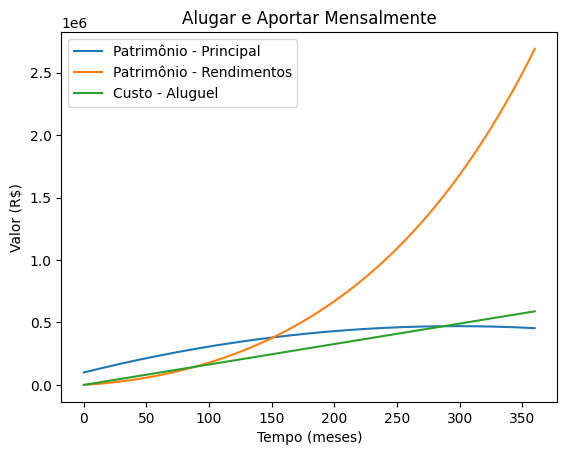

In [ ]:
alugar[['Patrimônio - Principal',
        'Patrimônio - Rendimentos',
        'Custo - Aluguel']
      ].plot(title='Alugar e Aportar Mensalmente')

plt.xlabel('Tempo (meses)')
plt.ylabel('Valor (R$)')


Veja o que dizem os números:

>  Ao longo de 360 meses, temos:
  *   R\$589.273,20 foram desembolsados com aluguel;
  *   O montante total em investimentos é de R\$3.144.815,24, sendo:
      *   R\$454.404,98 proveniente dos aportes (14,45% do total);
      *   R\$2.690.410,26 dos rendimentos (85,55% do total).

## Economizar e Comprar à Vista

O terceiro cenário considera a hipótese de alugar um imóvel e investir a diferença que haveria para um possível financiamento, assim como no caso anterior do aluguel. A diferença é que aqui o imóvel será comprado quando os investimentos atingirem o valor necessário. Nesse momento, o pagamento do aluguel será encerrado e os valores serão convertidos em mais aporte.

O patrimônio será composto agora de três partes, além da fração que é proveniente dos aportes como `Patrimônio - Principa`l e da parte proveniente do rendimento dos juros, denominada `Patrimônio - Rendimentos`, teremos o `Patrimônio - Imóvel`.

Veja o cálculo:

In [ ]:
# A parte inicial desse cenário é igual ao anterior,
# então iniciamos copiando os resultados
comprar = alugar.copy()

comprar['Patrimônio - Imóvel'] = 0.0

# A diferença é que o imóvel será comprado quando
# se atingir o saldo disponível, obtemos essa
# valor da planilha com o seguinte comando
tcompra = comprar[comprar['Patrimônio']>=valor_do_imovel].first_valid_index()

# Escrevemos na tela para conferência
print(f'O imóvel será comprado no mês {tcompra}')

# Nesse instante compramos o imóvel
comprar['Patrimônio - Imóvel'][tcompra::] += valor_do_imovel

# E descontamos o valor da compra do
# montante que estava investido
comprar['Patrimônio'][tcompra::] -= valor_do_imovel
comprar['Patrimônio - Principal'][tcompra] -=  valor_do_imovel - comprar['Patrimônio - Rendimentos'][tcompra]
comprar['Patrimônio - Rendimentos'][tcompra] = 0.0

# Então redirecionamos todo o valor que seria gasto
# com aluguel a partir daqui para mais aportes
comprar['Aportes'][tcompra::] += comprar['Aluguel'][tcompra::]

# Zeramos a atualizamos o cálculo com custo de aluguel
comprar['Aluguel'][tcompra::] = 0.0
comprar['Custo - Aluguel'] = comprar['Aluguel'].cumsum()

# Por fim, calcula-se a evolução do patrimônio a
# partir da data da compra do imóvel
for n in alugar.index[tcompra+1:]:
    comprar['Patrimônio - Principal'][n] = comprar['Patrimônio - Principal'][n-1] + comprar['Aportes'][n]
    comprar['Patrimônio - Rendimentos'][n] = comprar['Patrimônio'][n-1] * rendimento_investimentos + comprar['Patrimônio - Rendimentos'][n-1]
    comprar['Patrimônio'][n] = comprar['Patrimônio - Principal'][n] + comprar['Patrimônio - Rendimentos'][n]

O imóvel será comprado no mês 103


<ipython-input-17-67eea326dc3f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comprar['Patrimônio - Imóvel'][tcompra::] += valor_do_imovel
<ipython-input-17-67eea326dc3f>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comprar['Patrimônio'][tcompra::] -= valor_do_imovel
<ipython-input-17-67eea326dc3f>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comprar['Patrimônio - Principal'][tcompra] -=  valor_do_imovel - comprar['Patrim



> O imóvel será comprado no mês 103.



E produzimos a figura do caso:

In [ ]:
comprar

,Aluguel,Custo - Aluguel,Aportes,Patrimônio,Patrimônio - Principal,Patrimônio - Rendimentos,Patrimônio - Imóvel
0,0.00,0.00,100000.0,100000.0,100000.0,0.0,0.0
1,1636.87,1636.87,2486.311111,103129.714122,102486.311111,643.403011,0.0
2,1636.87,3273.74,2477.941111,106271.194919,104964.252222,1306.942697,0.0
3,1636.87,4910.61,2469.571111,109424.518098,107433.823333,1990.694765,0.0
4,1636.87,6547.48,2461.211111,112589.769853,109895.034444,2694.735409,0.0
...,...,...,...,...,...,...,...
356,0.00,166960.74,1152.941111,1568521.530853,558453.522525,1010068.008328,500000.0
357,0.00,166960.74,1144.581111,1579758.026722,559598.103636,1020159.923086,500000.0
358,0.00,166960.74,1136.211111,1591058.448543,560734.314747,1030324.133796,500000.0
359,0.00,166960.74,1127.841111,1602423.207619,561862.155858,1040561.051761,500000.0


Text(0, 0.5, 'Valor (R$)')

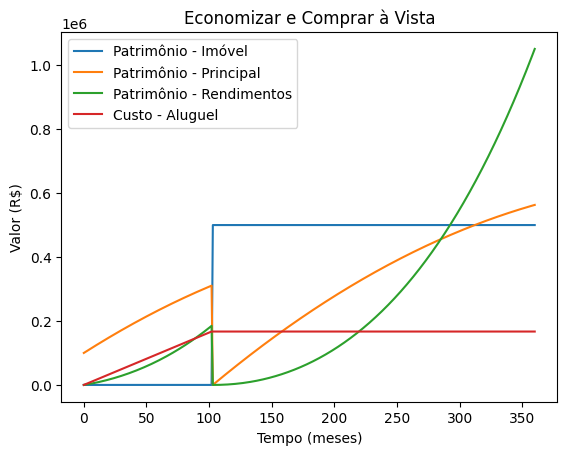

In [ ]:
comprar[['Patrimônio - Imóvel',
         'Patrimônio - Principal',
         'Patrimônio - Rendimentos',
         'Custo - Aluguel']].plot(title='Economizar e Comprar à Vista')
plt.xlabel('Tempo (meses)')
plt.ylabel('Valor (R$)')


Veja o que dizem os números:
>   Ao longo de 360 meses:
*   R\$166.960,74 foram desembolsados com 103 meses de aluguel;
*   O montante total em investimentos foi de R\$2.113.852,73, sendo:
    *   R\$562.981,64 proveniente dos aportes (26,63% do total);
    *   R\$1.050.871,09 dos rendimentos (49,71% do total);
    *   Além de R\$500.000,00 do imóvel (23,65% do total).


## Síntese dos Resultados

Para sintetizar tudo o que vimos até aqui, criaremos uma tabela auxiliar apenas com os dados observados ao final do período de estudos, e isso é feito facilmente em um DataFrame com o comando `.tail(1)`:

In [ ]:
# Criamos um DataFrame vazio
summary = pd.DataFrame()

# Adicionamos os valores obtidos na tempo final de cada um dos cenários
summary = summary.append(alugar.tail(1), ignore_index=True, sort=False)
summary = summary.append(comprar.tail(1), ignore_index=True, sort=False)
summary = summary.append(financiar.tail(1), ignore_index=True, sort=False)

# Vamos eliminar as colunas da tabela que não nos interessam
summary.drop(['Aluguel', 'Aportes', 'Patrimônio', 'Juros',
              'Amortização', 'Parcela', 'Saldo Devedor'], axis=1, inplace=True)

# E renomear as linhas de acordo com cada caso
summary.index = ['Alugar', 'Comprar à Vista', 'Financiar']

# Por fim mostramos na tela
summary.fillna(0)

<ipython-input-33-b44304c539f0>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(alugar.tail(1), ignore_index=True, sort=False)
<ipython-input-33-b44304c539f0>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(comprar.tail(1), ignore_index=True, sort=False)
<ipython-input-33-b44304c539f0>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(financiar.tail(1), ignore_index=True, sort=False)


,Custo - Aluguel,Patrimônio - Principal,Patrimônio - Rendimentos,Patrimônio - Imóvel,Custo - Juros
Alugar,589273.20,454404.980000,2.690410e+06,0.0,0.00
Comprar à Vista,166960.74,562981.636969,1.050871e+06,500000.0,0.00
Financiar,0.00,0.000000,0.000000e+00,500000.0,543678.18


Por fim, apresentamos a figura:

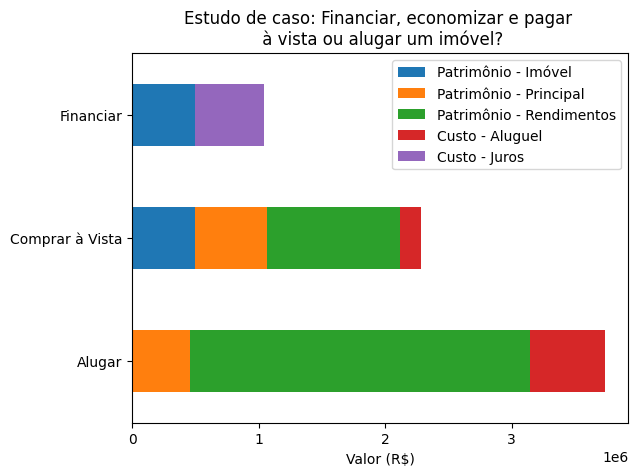

In [ ]:
summary[['Patrimônio - Imóvel',
         'Patrimônio - Principal',
         'Patrimônio - Rendimentos',
         'Custo - Aluguel',
         'Custo - Juros']
       ].plot.barh(stacked=True)

plt.title('Estudo de caso: Financiar, economizar e pagar \n à vista ou alugar um imóvel?')
plt.xlabel('Valor (R$)')
plt.locator_params(axis='x', nbins=5)

## Conclusão

Nesse estudo de caso buscamos identificar as possíveis diferenças nos resultados de financiar quatro quintos de um imóvel, alugar um imóvel para morar e investir o montante que seria desembolsado com a compra, e pagar aluguel enquanto poupa o dinheiro para comprá-lo à vista. Para quaisquer exercícios deste tipo, o valor da taxa de juros é sempre o principal determinante. Vamos considerar os juros como os valores pagos pela posse do dinheiro, onde você os paga quando é um agente deficitário – tem menos dinheiro do que necessita e precisa tomar emprestado – e os recebe quando é um agente superavitário – tem mais dinheiro do que precisa e investe o que sobra -, e que tem sua taxa definida pelas escolhas intertemporais dos indivíduos, as quais acabam por determinar sua oferta e demanda de equilíbrio. Para fins de simplificação e comparação dos três cenários em questão, mantivemos constantes as receitas e despesas das famílias, assim como a taxa de juros do financiamento em 9,42% a.a., do aluguel em 4% a.a. e dos rendimentos financeiros em 8% a.a. Os resultados mostram que ao final do período considerado, caso você não atribua valor – tenha prazer - ao fato de se considerar o dono do imóvel, os benefícios pecuniários serão muito maiores se for pago aluguel e investido os valores que seriam gastos com a compra do imóvel. Se por algum motivo essa não for uma alternativa, é mais vantajoso poupar o dinheiro enquanto paga o aluguel para efetuar a compra do imóvel à vista, ao final dos primeiros 29% do período.